# Linear Regression on Boston Housing Data

Import data and all necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
boston = pd.read_csv('BostonHousing.csv')

In [2]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
print(boston['chas'].value_counts())
print(boston['rad'].value_counts())
print(boston['tax'].value_counts())

0    471
1     35
Name: chas, dtype: int64
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: rad, dtype: int64
666    132
307     40
403     30
437     15
304     14
      ... 
280      1
313      1
351      1
422      1
285      1
Name: tax, Length: 66, dtype: int64


It appears that this dataset mostly contains continuous variables. Looking at the data types and observing the three integer columns, it looks like the variables `chas`, `rad`, and `tax` could possibly be categorical. This will be investigated further and confirmed to be true or untrue. Fortunately, there are also no missing or null values in this data.

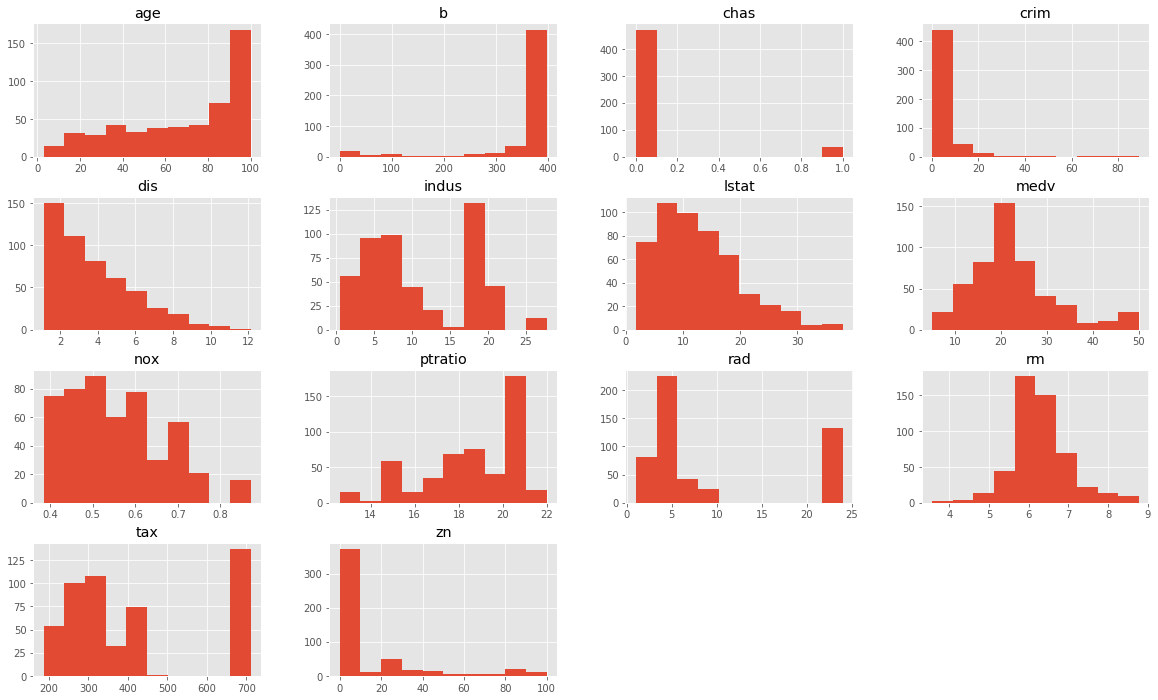

In [6]:
boston.hist(figsize=(20,12) );

Based on the histograms, there is quite a bit of skewness and kurtosis in these variables, particularly in variables such as `dis` and `age`. Some variables definitely have evidence of outliers, such as `rad` and `tax`. The target variable, `medv`, looks pretty normally distributed, although it looks like it has some outliers as well that will need to be taken care of.